### Creating Node Representations with DeepWalk

This project is a sample extarcted from https://github.com/PacktPublishing/Hands-On-Graph-Neural-Networks-Using-Python/blob/main/Chapter03/chapter3.ipynb. using Sucide_Detection_data.csv taken from https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch

Here we are trying to find the similar nodes represented through word embedding vectors and then do a random walk traversal of the nodes.



In [ ]:
import numpy as np
np.random.seed(0)

CONTEXT_SIZE = 10

org_text = """Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen.

Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it
Finally 2020 is almost over... So I can never hear "2020 has been a bad year" ever again. I swear to fucking God it's so annoying
i need helpjust help me im crying so hard
"I‚Äôm so lostHello, my name is Adam (16) and I‚Äôve been struggling for years and I‚Äôm afraid. Through these past years thoughts of suicide, fear, anxiety I‚Äôm so close to my limit . I‚Äôve been quiet for so long and I‚Äôm too scared to come out to my family about these feelings. About 3 years ago  losing my aunt triggered it all. Everyday feeling hopeless , lost, guilty, and remorseful over her and all the things I‚Äôve done in my life,but thoughts like these with the little I‚Äôve experienced in life? Only time I‚Äôve revealed these feelings to my family is when I broke down where they saw my cuts. Watching them get so worried over something I portrayed as an average day made me feel absolutely dreadful. They later found out I was an attempt survivor from attempt OD(overdose from pills) and attempt hanging. All that happened was a blackout from the pills and I never went through with the noose because I‚Äôm still so afraid. During my first therapy I was diagnosed with severe depression, social anxiety, and a eating disorder.
I was later transferred to a fucken group therapy for some reason which made me feel more anxious. Eventually before my last session with a 1 on 1 therapy she showed me my results from a daily check up on my feelings(which was a 2 - step survey for me and my mom/dad )
Come to find out as I‚Äôve been putting feeling horrible and afraid/anxious everyday , my mom has been doing I‚Äôve been doing absolutely amazing with me described as ‚Äúhappiest she‚Äôs ever seen me, therapy has helped him‚Äù
I eventually was put on Sertaline (anti anxiety or anti depression I‚Äôm sorry I forgot) but I never finished my first prescription nor ever found the right type of anti depressant because my mom thought I only wanted the drugs so she took me off my recommended pill schedule after ~3 week and stopped me from taking them. All this time I‚Äôve been feeling worse afraid of the damage/ worry I‚Äôve caused them even more.
Now here with everything going on, I‚Äôm as afraid as I‚Äôve ever been . I‚Äôve relapsed on cutting and have developed severe insomnia . Day after day feeling more hopeless, worthless questioning why am I still here? What‚Äôs my motivation to move out of bed and keep going? I ask these to myself nearly every night almost having a break down everytime.
Please Please Please someone.. anyone help me.
I‚Äôm so scared I might do something drastic, I‚Äôve been shaped by fear and anxiety. Idk what to do anymore"
"Honetly idkI dont know what im even doing here. I just feel like there is nothing and nowhere for me. All i can feel is either nothing or unbearably sad. Im ignoring friends every opitunity i can. I feel like im loosing my girlfriend. I only hurt everyone i talk too and i dont cause anything good. Im behind on my education, i feel alone but for the first time its not a feeling ive enjoyed. I have no hopes or dreams. I care about nothing, not family, not friends, not even my girlfriend (i still love her, its complicated and i dont have the words to describe it).

I would do something to end myself but i know im not strong and brave enough to do it, and knowing im that weak makes me sadder. The only thing i can do is push away all emotion and be empty, because as bad as it is im used to it, its my way of being normal.

I dont understand how people have hopes or dreams, and i mentioned how bad i was feeling to my girlfriend but she just got scared i would die so i havnt brought it up again. But in that talk i realised i cant even comprehend my life having meaning to anyone.

I know this is just me rambling and i will probably regret posting this as ill think im taking the place of someone having a worse time with a gun to their head. I encoage all people who see this to help them instead of me. Ill probably suvive, they might not. Plus my life is meaningless and my future bleak, while they could cure cancer or something useful.

Sorry for wasting your time"
"[Trigger warning] Excuse for self inflicted burns*I do know the crisis line and used it after when I was having a panic attack.
*I know it's not a healthy thing to do.

But, I did. I did something stupid out of impulse. I burned myself.  I REALLY need help with an excuse as the father of my daughter knows my history (we were together 12 years.) He's seen my at my worst - but! I had always only cut on my ankles and wrists, I'm thinking the excuse for this would be easier than one for cuts.


 I did work on my car last night and I hadn't self harmed in a LONG time. I just did it without thinking, as usual; impulse and lost in the moment.


Should I say I touched something under the hood while the car was still hot? I have 3 almost in a curved like pattern the first on forearm then down a little then on the side of my wrist. They are about an inch long, kind of wide and a little deep.

I think the car excuse  is a good one but I would need to say what I was working on to explain the 3 burns. Maybe that there was a wire smooshed behind the engine and when I went to fix it I touched the engine?

I do not want to self harm again, I just need to be able to explain this."
"It ends tonight.I can‚Äôt do it anymore.
I quit."
"Everyone wants to be ""edgy"" and it's making me self conscious I feel like I don't stand out. I can draw yes and play the guitar but I honestly feel like am stuck in the past, my taste in music are all rock and alt metal from
2000's to the 90's and it doesn't really make me feel unique it's just my style but seeing as my friends and classmates getting more into rap and EDM it's hard for me to feel like I fit in.
The I don't feel like I stand out is because of all the others copying a style and if I do that I'd be just another
""Quirky kid"" who's in a cringey phase.
Many of my friends say that I look good in grunge style and I kinda agree but it's hard for me to continue that if I can't even stand out from all the ""edgy
People who wore crosses and wallet chains and do tiktoks""

Really feels like I don't fit in in all categories, am scared that people might confuse me with a CLOUT CHASER or a fucking tiktok e boy goddamn
I hate my life"
My life is over at 20 years oldHello all. I am a 20 year old balding male. My hairline is trash and to make matters worse my head is HUGE. I have bipolar, depression and crippling social anxiety. Balding has been the cherry on top. I wear a hat 24/7 even in my room when I‚Äôm alone because I can‚Äôt stop thinking about it. I pop Xanax all day to try and numb the pain and it works for a little bit but it all comes crashing back twice as hard once I come down. I don‚Äôt know how to communicate with people anymore and I don‚Äôt know how to keep a relationship. I used to be one of the ‚Äúpopular kids‚Äù but after my dad passed away I feel into a deep dark hole. I‚Äôve been arrested numerous times, been in rehab, mental hospitals, you name it. The only reason I haven‚Äôt killed myself yet is because of my mom and brothers. If I didn‚Äôt have them I‚Äôd be dead long ago. But it‚Äôs getting to the point where even their love and support isn‚Äôt going to be enough to keep me alive anymore. I‚Äôm either going to be the guy who killed himself, or the guy who went bald and 20 and looks like a child molestor. Which one would you choose?

I took the rest of my sleeping pills and my painkillersI can’t wait for it to end, I’ve struggled for the past 6 years and I’m finally ending it.
"Can you imagine getting old? Me neither.Wrinkles, weight gain, hair loss, messed up teeth and bones, health issues, menopause, hormones, hating new generations &amp; the way world progress.

Being a useless angry piece of shit who can't take care of itself. Being totally depended on people who secretly wants you to die already.

Can you even imagine yourself there? Absolutely not. Even if I was happy, I'd take my life just to avoid this. "
Do you think getting hit by a train would be painful?Guns are hard to come by in my country but trains are not. I just don't want to suffer though, do you think this would be a painless method of suicide?
"death, continuedI posted here before and saw something interesting.  I asked for information.  You know what I got back?  A bunch of people who wanted to do the same thing to me as they always do: spit back personal information about me.  This makes things worse, obviously, but at least a bunch of trolls are having laughs.

In the end, my desire to self-terminate grows stronger.  I have so little left now, but still have the same bitterness, just a bit stronger now.  The main goal throughout the process is to minimize the subsequent fallout.  It would certainly have been nice had the patrons of this forum been more respectful of my privacy, but that was obviously a bit of a ridiculous expectation, considering the source."
Been arrested - feeling suicidalEdit
Fuck the verizon smart family app I can’t even watch porn privately anymore wtf why is that a feature
"I’m scared.   Everything just seems to be getting worse and worse. I’m young and I think I’m transgender but I’m not even sure about that. I can’t tell if I’m just lying to myself or if I’m actually trans, I feel so overwhelmed with thoughts and emotions and I can’t just take it anymore.
    I just wish I could at least know for sure if I was trans, and even then I have to worry about if my (religious) family will be accepting and if I can actually do anything to alleviate my pain a bit.
   I cut myself for the first time yesterday, I barely even drew blood so I can’t even fucking hurt myself correctly. I don’t think I’ll ever be able to do anything correctly, I want to pursue music but I know there’s no money to be found in that field unless I become famous but that’s not happening.
   Currently I’m not seriously debating suicide but the thoughts keep coming back and they just keep getting worse. I’m not sure if I can really take this much longer, I just wish I was born a girl. I want to cry."
"Well, Im screwed. I locked myself in the school toilet, and can't get out. For now.

Edit: I'm out now, I lived to tell the story"
"I'm fucked assignment is due tomorrow and I haven't even started yet.

:)"
"yeaputting a knife to my wrist didn't give me any hesitation like how it used to, i am free from that, free to finally die

i hate seeing people having fun, it's just so depressing for me.

my sister goes out every night with her friend, it's nice to see her get out of her depression but at the same time

it hurts really bad

i have nothing now, it makes me realize that haha"
"I am ending my life today, goodbye everyone.I am 36 almost 37, I am on disability for PTSD and Rheumatoid Arthritis. I am 400 lbs and sick of living. I am tired of being single and rejected and made to feel as if I was some kind of monster. I am tired of not having anyone to connect with, to connect too, to have a companionship with. I am tired of being alone and single in this world, all because of my weight.

This loneliness has taken too much of me, it has swallowed me up from the inside out. It has consumed me. I see nothing but darkness everywhere I look. I see nothing but hate towards me everywhere I look. I have absolutely no one in my life. and this loneliness reminds me of it every day.

I am done with this world and ending my life today so goodbye everyone, by the time anyone reads this I will be dead."
Me: I know I have a really toxic house and I do my best to cope with with it by going to school, etc Rona: hahahaha, stay at home forcefully go brrrrrrrrr
"Trapped inside a voidDear whoever cares enough to read this, though I doubt there are any that fall under that criteria.

I am trapped inside a void.  There is absolutely nothing for me.  I go through the monotonous tasks of every-day life with nothing to look forward to, no aspirations whatsoever.  The only saving grace I felt like I had, the only thing that made me feel like I was wanted, and accepted me for who I am, was Maren.  As absolutely idiotic as it sounds (and she’s assured me that it is,) talking to her was the one thing I looked forward to every day.  It was the one thing that kept me going; knowing that some time throughout the day I would be able to talk to her, even if only briefly before we went to sleep.

She made me feel accepted.  She made me feel like I had some kind of worth.  She made me feel like I could actually like myself, and be okay with who I was.  But most of all, she made me feel loved.  Never before have I ever been able to open up to someone so completely.  I felt completely at ease when talking with her.  I’ve told her things that no one else in the world knows about me, and she made me feel like she actually cared about them- that she cared about me.  We shared many intimate moments that I would never dare have with anyone else.  We talked about getting together, being with each other, devising crazy scenarios with how to be together.  We talked all the time, nothing could keep us apart.  Except for Ty.  She helped me through all of the problems I was facing related to my depression over the break-up with Starr.  She talked to me whenever I needed her, and she always made me feel better about it.  She was my shining star in a pitch-black sky.  None of this is any longer, though.

We have slowly drifted apart as she began to realise exactly how I am.  I am sure she regrets getting involved with me, and I don’t blame her.  I do nothing but hurt her these days.  None of it is intentional, but it happens nonetheless.  When we first started talking again, I told her about my clingy tendencies and she said she was okay with that.  I suppose she thought I was over-exaggerating, but I wasn’t.  I need to have interaction in my life.  I know it is not fair to the people around me, and I know that it is not what they want, but I cannot be alone in my own thoughts all the time.  My thoughts are extremely self-destructive.  I need someone to spend time with, someone to talk to to get away from my thoughts.

For about four months I was legitimately happy.  That was probably the only time in my life I have ever actually been legitimately happy.  I was finally over Starr, thanks to the help from Maren.  I had no stress at all, things were actually looking up, even my migraines were becoming few and far between.  I was in love, and I felt loved.  If I could go back in time and re-play those four months over and over again, I would without hesitation.  That was the best time of my life.  I didn’t have people ridiculing me for various reasons beyond my control.  I didn’t have to feel like I had to hold all of my feelings inside.  I could share them with Maren, and she was incredibly receptive.  I didn’t have to lie about who I was, or leave details out.  Maren made me feel like I was a good person.  I told her about my past, and she seemed genuinely concerned for me.  She tried hard to dispel all of the hateful things I have been told about myself.  She told me that I was attractive, something I had never been told before, not even by Starr, who I was together with for ten years.  I was happy with who I was at that time.  Prior to that I had never willingly taken a picture of myself.  But with her, we would send each other snapchat pictures, and she made me feel like I wasn’t the hideous person that I thought myself to be.  In hindsight, I am sure that she was just being nice to me, and that she did not actually think I was attractive.  It was still nice to hear it, though.

I miss those days.  I long for them to return, but I know that that will never happen.  The same thing has happened with many people before, though none to that extreme.  They are fine with me when we first start talking, and eventually they realise how high-maintenance and fucked up I am.  That causes them to drift away, until eventually we stop talking altogether, or sometimes they just abruptly cut me out of their lives.  That was the case with Starr.  The night before she broke up with me she told me that she loved me.  In the morning, she told me it was over and a few weeks later told me to never talk to her again.  After ten years of being together, she ended it on a whim, and caused me to lose not only my significant other, but also my best friend.  The same thing is happening with Maren.  I am driving her away, and eventually I will not have a best friend again.  I will be completely alone.  The last time I was completely alone, right after Starr broke up with me, I didn’t leave my room for two weeks.  I didn’t eat a single thing in those two weeks.  I laid there in bed, staring at my ceiling in the darkness, constantly in tears, trying to realise where I had gone wrong.  I have never cried so much in my life.  I have hid my emotions from outside view all of my life, but at that moment I could not contain them any longer.  I had absolutely nothing left for me in the world, and that is how I feel again, right now.

It was complete luck that I was actually able to reconnect with Maren again.  I have no idea at all how to make friends.  She just happened to be online on Facebook when I was feeling at my absolute lowest.  I sent her a message with no expectations whatsoever, I was prepared to either be completely ignored, or told to go away.  That didn’t happen though.  We had a wonderful conversation, reminiscing about our childhood.  I don’t remember how the subject got changed to me talking about Starr, but I told her everything, and she seemed like she genuinely cared about it.  She stayed up with me until the morning, just talking with me on Facebook.  I was in tears for most of that conversation, partly because I was still upset about the breakup, but also because I couldn’t believe that someone actually cared.  Especially someone I hadn’t talked to in over a decade.  When we started to get close, and revealed our feelings for one another, we joked about how us reconnecting was a “red string of fate.”  I don’t believe in fate, but I also don’t think it was just dumb luck that caused us to reconnect at that moment, when I felt like I had nothing left.  The problem lies in the fact that I will never be able to replicate that with anyone else.  I am incredibly socially awkward; I cannot make new friends at all.  In person I just completely freeze up and get overwhelmed with anxiety.  Online, I just have nothing to say.  I am a boring person.  I have tried to make new friends on various subreddits, /r/r4r, /r/kikpals and the like.  I have talked to a few people who seemed nice, but none of them developed into an actual friendship.  They all stopped talking to me after one session.  I don’t have anything at all to give in a friendship.

After fighting with Maren, and being told that I can’t keep badgering her to hang out with me, when all I asked was that if she was going to be able to talk after she was done watching Game of Thrones with her new boyfriend (who was her ex,) my self-worth is absolutely rock bottom.  She has made me realise that I am the problem, that it is my fault my relationships always dissolve.  She joined me in blaming Starr for the dissolution of our relationship, but I see now that it was never her fault.  I am just completely unlovable.  I can never have more than one true friend.  I believe this stems from the fact that growing up, I had very few friends, and when I tried to expand and make new friends I got burned very badly, every time.  Because of this, I latch on to the one friend I have.  I suffocate them.  I bother them until they cannot stand it any more, and leave me.  I have tried so hard to give her space, and not ask her to hang out with me, or talk to me, but whenever I try, I get extremely depressed.  I have spent the past two weeks in extreme depression.  I was hoping that by the weekend we would be able to hang out and it would alleviate some of it, but she cancelled our plans in favour of hanging out with someone else.  Every time I ask her to do something and she says no, I get a sinking feeling.  Mainly because in the four months that I was happy, we did everything together.  Any time I asked if she wanted to do something, she was happy to hang out with me.  She was happy to talk to me nearly every moment she was awake.  I suppose that is only sustainable for so long until someone would get bored of me.  I have very little to offer, it was mainly her driving everything, and that must have been exhausting.

I am getting tired of writing, though.  I recognize my faults and all of my flaws, but I have no knowledge or motivation to fix them.  I have lived with them my entire life, and not a single person has stayed around because of them.  I am writing this because I now have zero friends.  I am completely alone.  No one in the world would even notice if I fell off the face of the Earth, or faded into oblivion.

Goodbye,

Steven"
"Posting Galadriel’s opening monologue every day until I get a girlfriend Day 3 Galadriel: (speaking partly in Elvish)

(I amar prestar aen.)

The world is changed.

(Han matho ne nen.)

I feel it in the water.

(Han mathon ned cae.)

I feel it in the earth.

(A han noston ned gwilith.)

I smell it in the air.

Much that once was is lost, for none now live who remember it.

It began with the forging of the Great Rings. Three were given to the Elves, immortal, wisest and fairest of all beings. Seven to the Dwarf-Lords, great miners and craftsmen of the mountain halls. And nine, nine rings were gifted to the race of Men, who above all else desire power. For within these rings was bound the strength and the will to govern each race. But they were all of them deceived, for another ring was made. Deep in the land of Mordor, in the Fires of Mount Doom, the Dark Lord Sauron forged a master ring, and into this ring he poured his cruelty, his malice and his will to dominate all life.

One ring to rule them all.

One by one, the free lands of Middle-Earth fell to the power of the Ring, but there were some who resisted. A last alliance of men and elves marched against the armies of Mordor, and on the very slopes of Mount Doom, they fought for the freedom of Middle-Earth. Victory was near, but the power of the ring could not be undone. It was in this moment, when all hope had faded, that Isildur, son of the king, took up his father’s sword.

Sauron, enemy of the free peoples of Middle-Earth, was defeated. The Ring passed to Isildur, who had this one chance to destroy evil forever, but the hearts of men are easily corrupted. And the ring of power has a will of its own. It betrayed Isildur, to his death.

And some things that should not have been forgotten were lost. History became legend. Legend became myth. And for two and a half thousand years, the ring passed out of all knowledge. Until, when chance came, it ensnared another bearer.

It came to the creature Gollum, who took it deep into the tunnels of the Misty Mountains. And there it consumed him. The ring gave to Gollum unnatural long life. For five hundred years it poisoned his mind, and in the gloom of Gollum’s cave, it waited. Darkness crept back into the forests of the world. Rumor grew of a shadow in the East, whispers of a nameless fear, and the Ring of Power perceived its time had come. It abandoned Gollum, but then something happened that the Ring did not intend. It was picked up by the most unlikely creature imaginable: a hobbit, Bilbo Baggins, of the Shire.

For the time will soon come when hobbits will shape the fortunes of all."
"Do you sleep with Socks On,and how do you feel about sleeping with socks on? (I tried it for the first time with heavy long socks and it felt really nice when I woke up) Here are some benefits according to Healthline


* **Prevent hot flashes:** Some women find wearing socks helpful for cooling their core body temperature.
* **Improve cracked heels:** Wearing cotton socks after you moisturize can help keep your heels from drying out.
* **Increase potential orgasms: According to the** [**BBC**](https://news.bbc.co.uk/2/hi/health/4111360.stm)**, researchers accidentally discovered that wearing socks increased participants’ ability to achieve an orgasm by 30 percent.**
* **Decrease chance of Raynaud’s attack:** Raynaud’s disease is when affected areas of the skin, usually the toes and fingers, lose circulation and start to throb or swell. Wearing socks at night can help prevent an attack by keeping your feet warm and blood circulating."
"The graveyard of redditAnyone find it eery to think how many dead users this subreddit has?

Too often ill see a "I'm killing myself tonight" post from a active redditor only for them to never post again."
Guys I want friends That’s it , I’m alone and don’t talk to anyone dm me or anything, I’m just tired of only talking to my dad and sister, literally only my dad and sister , I like animated series but I’m flexible to anything the last series I watch was Santa Clarita’s diet and the last animated series I watch was the hollow and shera ( I was watching them at the same time ), and I have a very extended music repertoire I can draw you anything you ask ( or at least I’ll try ) you can text me at any hour of the day , I pretty much only do that , I have weird family anecdotes and stories I can tell you  , but if you are not interested in anything I mentioned it doesn’t matter I’m just here to be a friend
"I think today may be my last.Everything's becoming too overwhelming and once it's late enough into the night I think it would be enough to go and finally end this miserable life of mine. I have a plan that works, if a certain friend doesn't call again. But I don't know if I'll be able to actually move.. I don't know what I want anymore but dying fixes everything, like this pain in my chest... And everything else.

Dying would fix everything, and I'd stop being such a nuisance and a past to the people I care about.

I can't waste anyone's time if I'm dead.

&amp;#x200B;

I think once the time is right, I'll go."
I’m trashLol I normally cringe at the self loathing posts here but honestly I’m such trash. Like literally everything about me.  I just wish I could muster up the courage to just follow through. This is it and I’m okay with that that:  everyday here is worst than the last.  I appreciate this community for letting me know I’m not alone.
"Nice songs &lt;3 Nice songs to vibe to-
Loverboy/a-wall
Come true/khai dreams
Weak when ur around/blackbear
All I need/khai dreams
Carwash/striptease (slowed)
Please listen to them :)"
What is the best way to do it?I’m not looking to be talked out of it. What would be the most effective, easiest way to go?
"Man I hope someone finds thisI am drunk as fuck.  I found that I have hodgkins lymphoma. I don't want my fam to suffer through that shit.    So I'm taking my life tomorrow. You guys think If I point a knife to my heart and fall downwards I'll be done easy.  I hope so.  That's what I'm going to do .

Man , I hope my girls moves on. She is so sweet. She loves falling to sleep in my arm . She is next to me. Hopes she thinks I am a coward.  Hope she hates me for what I did instead of feeling sad.  Man , hope my brother isn't too affected. He is a good soul . Fuck man , I'm rambling  . Sorry.  I am gone tomorrow.  No more bullshit posts like this."
Today's fact is Reddit awards are expensive emojis
I feel like I am drowningI used to go to school at a state university, then I had to drop out for financial issues. It's been a year since then and I haven't moved anywhere in my life. I have one job (15 hours a week, so I don't make enough money for essentials like food, soap, toothpaste, etc..) and I am trying to find another job but I can't find one. I feel like I'm going to be stuck in this hole forever and  part of me just wants everything to be over. I apply to 5-6 jobs a day and make sure to call back but all I get is an explanation as to why they don't need me. I also haven't been able to afford a haircut for 3 months and I'm self-conscious about it because my hair never gets long and it feels gross. I spent all of this month with my bank account overdrafted and I have no clue how I will pay rent. Sorry for rambling, but I can't stop thinking of killing myself and I really want help.
Is it worth it?Is all the trouble, work and anxiety really worth living for.
I triple nipple dock dare you To ask out your crush, or if you're taken tell them that you love them
"I'm a lonely 22 year old guy and feeling like a loser with no future.I'm 22 and feel all alone and I am very insecure about myself. I'm a fat 6'3'' 260 pound guy with a really small 5.5 inch penis. I have no gf or any experience with girls cause I feel too ugly and I think they will laugh at my size. I only have one real friend and barely any family left that still cares about me.

On top of all that I have no college educaton or any idea what kind of career to pursue. That leaves me working a shit minimum wage job I hate and living my life paycheck to paycheck. I just feel like saying fuck it all and giving up on life for good. I feel like the biggest fucking loser in the world. There are 16 year olds more successful than I am and it's just sad."
"I hurt another person because I am too ungrateful that I am alive.I feel so messed up.
I was venting to someone on chat, and I told him what I am planning to do. Killing myself sometime this week.
He told me he has lung cancer, only 5% chances to live, and he wants to live. He called me ungrateful fucking shit because I want to kill myself only because I don't feel happy with anything anymore, how he wants my life. I hurt him so badly. I apologized like 100 times. I know I can't just apologized about that. He sent me a video with himself calling me all these things, and he was literally crying his eyes out.
I hate myself. I did hurt him so badly..
I still want to die, even more now. I cut myself for the first time ever today. Just to feel a little better.
I can't forgive myself now.
I am still planning on killing myself, I guess.
He told me to never talk to him again."
"revenge suicideDoes the thought ever cross your mind? Do you ever alone, isolated, uncared for? Do you feel like youve reached out over, and over, and over, and yet no one hears you or takes you seriously? Do you ever feel like everyone in your life has given up on you?

I feel like jumping off this roof right now is the only way anyone will ever notice, or care, about how much pain I feel. No onewill care until Im dead, and then people will finally hear me. they'll understand I was serious. theyll understand how much pain Im in right now. Theyll wish they would have tried harder to listen every time I spoke about hurting myself, or ending my life, over the past twelve months.

I may be dead, I may never be here to see it, butpeople will finally care. Peop'e will finally notice my pain. And itll be okay, because ill be dead, and because there wont be any more pain. there wont be any more anything. and thats really really okay.

im a coward. im an enormou fucking coward. but im sitting up here, on this roof, slowly dosing up on medication. i hope that if i wIt long enough, if i take enough ativan, i wont be coherent enough to feel fear, or regret, or second thoughts. ill be dead near instanstly when i jump. Its finally gokng to be over, and I feel so happy"
Hey, im gonna sleep with socks Whatcha gonna do? Put them off?! Good luck ima gonna sleep with warm feet
I learnt a new skill today! I learnt how to change a light bulb, only thing that happened was I cocked up the first time and it went out after 5 minutes, so I tightened it a bit and it now works. My room had been lightless for quite a long time and I finally have a bulb in the light.
"I have nothing to live for.My life is so bleak.

I don’t have any genuine friends, I feel like a stranger in my own family and I’ve scared off the only person I truly cared about. I have no future or goals to look forward to. My life is falling apart and I’m just letting it happen because I’m so, so exhausted.

I just don’t know if I want to be alive anymore."
"I thought I had got past these thoughts....This might sound weird but my Dad passed away quite suddenly two months ago. I did get to talk to him before he died but it still hurts. I had been quite suicidal prior to my dad's passing but for a month after those thoughts hardly entered my mind. But now they seem to be the only thing that occupies my mind. I been trying to deal with my depression with therapy and meds but I don't think they are really working.

This all came to the forefront since I quit my job to start a business with two friends but everyday I feel like we made a huge mistake and we are going to lose everything. The business is puttering along but it has not taken off enough to pay us a wage. Every month I juggle figures and hope we have enough money and credit to pay our bills.

I hate being the boss, I wish I had never quit my job. Sure you deal with the crap managers give you but at the end of the day you can go home and switch off, unlike now where all I do day after day is worry about losing our home.

I really wish I could go back in time and undo this decision. If some one presented my with a button that said it would kill me in my sleep in 24 hrs I would push it and be thankful."
Why does no one use the email function of reddit It's kinda sad, so underappreciated, edit- have y'all never used the email function, how uncultured
"Closing the book on my lifeI have tried everything. No one knows what to say because really, what is there to say. All people can say is “it gets better,” or try and guilt trip me. I get it. There’s only so much one can say and do in these situations. It’s not up to other people to help me. People don’t understand how deep this goes. I guess I can’t blame them. But I deserve to feel this way. I’m scared but I think I’ve made up my mind on what needs to be done.

I don’t think I’m going to post anywhere anymore. Whatever happens to me, happens.

At least I know I tried."
math class always makes me so horny i always just zone out and think about what i’d do to my partner if i had one like damn i’d spoil them so much and like ooh damn it’d be so hot i gotta get bonked sorry guys
I've become so accustomed to the fact that I'm going to kill myself that other people's struggles with suicide don't register to me muchBecause I think about it so much I just see them as another person like me. It also makes me feel like everyone is like me, so if I went to kill myself and people were around nobody would care.
My school sucks. I try to prevent generating waste, but it seems impossible when even when I BRING MY OWN REUSABLE MASK, MY SCHOOL GIVES ME 2 MANDATORY DISPOSABLE MASKS. I can't give them away, I can't do anything with them, and 2 OF MY SIBLINGS ARE GOING TO SCHOOL AS WELL. DOING BASIC MATH SAYS I GET 30 DISPOSABLE MASKS A WEEK. I hate this.
After- in the UKIf I die, is my brother financially responsible for my council flat? Like, if I die will it cost him money? Or will the council clean it out? Will the council dispose of my body, or will he be stuck having to pay for it?
I’m wondering how some of you guys are going to celebrate Valentines Day. I I m going to celebrate it with my Lucina and Corrin plushies.
"7 YearsGuys, I've been here before, a few years ago. You were all more or less supportive the last time (more or less) so here's a belated thank you for the kindness.

I've been dealing with an unbelievable degree of stress for a long time now. From repeated experience I'm way better off not hoping for anything whatsoever. For this reason, I've decided not to go into any details on this post. Instead I'm going to put [a link here](http://llawht4.blogspot.com/2012/09/with-every-breath.html) which serves as a reference to these insane events in my life. (I chose a blog entry that happened a few years back because it's less of a rant than normal.) I'm not doing this for you guys to pour over as it's heavy reading...and intense, so don't worry about it. I like to think of it as an "rlexperiment was here"--a marker of my existence.

Please don't reject this post. Please don't force me to share information. Please don't take it against me if I don't reply back to those who might comment. I'm conserving my energy. If you're sincere and good-willed, then know in advance that I appreciate your kind gesture. I might very well die from my circumstances, miserable and alone. But hey! Right now, I'm not in such a bad mood. I'd like to wish you all good cheer and happiness."
I cant stop feeling like my therapist didn’t believe I actually had any problemsI feel like he thought I was a fake he didn’t even do the full 6 trial sessions with me I feel so disconnected and fucked I am meant to find a longterm therapist but I ant do it I just can’t I have nothing to expel my fucked up thoughts I want to die I am going to clear my overdraft by the end of the year then buy a mask and nitrogen and fucking end it I’ve gone my entire life with no one believing I’m fucking depressed and no support my family and doctors are just fakes they are just a fucking facadec
Put opinions here Just say any controversial opinions you have that you want to share. And don’t make fun of others’ opinions. If you don’t agree just ignore.
I Accidently Cut My Dick With Scissors HELP
Since my aunt's suicide 3 weeks before Christmas, I drink, take painkillers or both. I can't stop thinking I'll kill myself too.I see so much of myself in her it hurts. She wasn't even twice my age. She hung herself with a doglead. Broke a hundred hearts. I'm absolutely not afraid of death. Only the out coming for the people who love me. I come from a family of functioning alcoholics but I can't stop drinking. I drink a lot on my own. I self harmed after a rape I never told anyone about. I've not for a few years now, almost 7.
I'm so excited for tomorrow I'm going to my momals house and after I get some school work done I'm going to try to play enter the Gungeon with my friend and I can't wait see his reaction to this bullet hell
What you guys gaming? Any good games your playing?
"I need to know a good pistolI’m shopping online for pistols right now. Tonight’s been rough.

I have no clue about guns whatsoever but I’ve been depressed for years now and I’m growing weary.

So basically I’m hoping someone can point me in the right direction of a good pistol that can end me without just maiming me.

I have no idea. Money is no object at this point.

Any help is appreciated!

Brian"
OwThe past is unforgiving
ive been suicidal for so longi dont think im truly “depressed”, but suicidal. idk if that even makes sense but im drunk rn. failing community college, i have good friends but i dont want to burden them with this info. i dont know what im looking for in life but i hate myself. im intelligent but ive never applied myself. i have trichotillomania and hardcore BFRBs. i want to talk to someone i guess, though i dont. i dont know, ive become apathetic and i think about suicide every day. suicide = no stress. maybe ill get super drunk and jump off a high place, thanks
Do you do this? On YouTube when you look at comments, do you randomly click on an account and subscribe to them if they have any videos?
"breakup? family guilt?the person who i thought was absolutely perfect for me just broke up with me yesterday. it came absolutely out of the blue, and they said it for reasons that i didn't know were problems/reasons they've never brought up before. i know the advice is generally "get back out there! plenty of fish in the sea", but i'm so fucking ugly and antisocial that i felt like this was really my one chance at being in a happy relationship. i became pretty codependent for the time that we were together, since they were basically the only thing in my life that made my depression abate for periods of time

&amp;#x200B;

i feel like i'd be putting a gun to my head right now and pulling the trigger if i didn't have family members that would be sad. does anyone else feel the same way? i want so badly just to be done with all of it but i imagine my siblings and parents reactions and i just know i'll never be able to do it"
I don't know where to goI've been homeless for Going on 2 nights in seattle. I don't know where to go, I have no friends or family here. I'm stranded, walking in the city and looking at all the people. I just wanna be gone. I am lost here and I just want the pain to end. I know I am not being smart about this, but I don't know where to go anymore. I feel so lost physically and mentally. I feel detached from everyone... I feel like this is my last day on this planet. Time just goes so slow when you have no where to go. Then the night comes and I am afraid to close my eyes. Is it even  worth trying to get back up?
XD THIS IS SO RELATABLE!!!!!!1!!!!! XD my mom had to get a rape whistle, pepper spray, and a pocket knife all because someone was following her in a truck while she was running a few days ago causing her to go into a random persons house and retend like it was hers, and after about an hour of the truck in front the house it left making her free. I am genuinly afraid for my family and especially my mom. i just hope you guys can send blessing to her and my family.
BLM are anarchists! They don’t listen to the full story, blame police for doing there job! Load of shit!!!
"So after being single for 16 years, I finally found one. She’s perfect. She’s charming. She’s the best I could find. She’s also super adorable.

Kylie, I know you’re gonna see this so I want you to know that I love you.

 u/iamatexan124"
Not having a crush during quarantine. So I’ve never had a girlfriend. Last year was the first year I actually tried to make an attempt to date but all of those fucked up and I’m in quarantine now. And right now I’m feeling like shit because I don’t have a crush. That may sound pathetic but even though it was quarantine and it’s not a good idea to start a relationship during quarantine and probably wouldn’t but it was still nice to have someone to think about. A lot of nights I just feel hollow. Its not necessarily a feeling. It’s the absence of one. I don’t know I might sounds stupid right now just need to get some stuff out.
"Where's the love?I live in this world and it's not like your imaginings. The books you read have little relevance.

People like to get by and they do so relatively quickly and without response,  as do you. And so it goes on.

So why not die, why imagine that this world is somehow more special than it actually is.

I've been alone for so long and for little reason. I don't approach anyone, thay is my fault, but ly god are people in general boring spews of nothiny, and if not then they are hipsters with judgements. And that can be fun, but it's just an empty form of stimulation.  I want to go. I'm tired of trying for the few days of fun but emptiness "
Exams are coming My exams  are coming. Those are very important. You can say Nationwide competition of grades. Well I Just started studying (again) and only  2 months are left. It's not a rant post or any complaint. I just wanted to tell someone I am really scared now.
"ok i feel bad about this and i want to get it off my chest i ordered donuts from deliveroo on the website but couldnt figure out how to tip the delivery rider throught the website, so i thought that i would just tip in cash. i was doing some stuff then i hear a knock followed by 'ok thank you' and a engine noise. my fucking brother went to get the food, didnt know about the tip thing and didnt even bother to tell me 'you your food is here' and i feel bad that the deliveroo driver didnt get the tip.

they completely deserve the tips, and i always tip waiters/waitresses in any pub or restaurant, i just couldnt figure out the website and my brother answered instead of me so the rider didnt get the tip.

i honestly feel kinda bad even though i dont feel like it was 100% my fault.

thanks for letting me get this off my chest. that felt good!"
"SuicideI didn’t plan on overdosing again, as in I figured I would kill myself in a different manner, but with the world as it is, overdosing is looking good. I have the pills ready. I’ve had ‘extra’ medication for months now. I have two months of everything I take. I have enough. Now, I must follow through.
Goodbye to everyone!"
"Anyone planning suicide in the long-term future?I'm a depressed 22F who is considering suicide, but not soon, but within maybe 4-5 years.
Why do I want to kill myself?
It's kind of a long story. But the main reasons are a combination: (Lack of) Economic Stability, Health Problems, Family
along with a lack of purpose or inherent value of life.

**Economic**:

Growing up was hard and I've had to overcome a lot of adversity (lower-income household, mother dying at
a young age, being a queer person of color, strict parents, depression etc), like a lot of people here.
I'm in college currently, but found that although I genuinely love learning and picked a STEM major, college
just seems very oppressive. I know it makes me sound like an entitled, first world millenial.
My parents made me go the flagship state school directly after high school, not allowing me to choose a different school
or even CC for a few years (I had relatively good grades in high school). I knew from the moment I was on campus
that I hated it; lack of diversity and friendship, my health was negatively impacted, I didn't have a good sense of direction
or idea for a major/career and never felt inspired. I thought about transferring, but didn't have the
resources or finances (first-generation college student), so I stuck it out though I was depressed. I did well academically
but since my major/department is kinda shitty (applied math), I'm worried that I won't get a good paying job, unlike
engineering students. Like had I known earlier, I would have just majored in that instead. I will leave college
next year with about 25-28K in loans.

**Family**:

Generally, I strongly dislike my family life. My other siblings went to medical school and basically left the house
as fast as they could. My mom died at a young age, and instead of helping me out as possible with school or becoming
self-sufficient, my dad remarried and spends his money on his new wife (unemployed) and kids, even though he's pretty old
and should be focusing on retirement. I haven't come out as queer yet, but worry that my family will disown me because of it.
(not super religous, but super conservative, strict and family-oriented). My parents are also immigrants so we don't have
tons of wealthy family here.

**Health**:
I have a lot of chronic, probably genetically-caused, health diseases since I was young.
When I was young and in my mid-teens, I was able to take care of them when my parents were employed and supportive.
After my mom died, my dad didn't bother helping me out that much and without the resources for seeing specialists
anymore, my health has decreased. It's hard at college too, because I don't have a car, and I didn't always have
health insurance to be able to see anyone. So my health continues to decrease. These aren't
life-threatening health issues, but irreverisble for the most part and make me feel insecure and self-conscious.

So because of all this, I find it hard to justify continuing life. I am kind of a nihilist and definitely
an atheist with no absolutely no belief in the afterlife. I don't want to kill myself yet, but in 3-4 years,
when I can be more distant from my family and meticulous in suicide-planning once I'm in the "real world".
I've seen many psychologists over the years, but rarely find them helpful or knowledgeable, and condescending even.
It seems statistically unlikely that a queer woman of color from a first-generation college student background with severly
limited family support, chronic health issues, and student loans to be economically secure in like, even 5 years. And it's
hard to see my straight, white, male friends from more accepting and upper-middle class families succeed in life, when it's a
constant struggle for me.And even if I can push through and somehow find a way through the misery, what's the point? Why suffer and
struggle so much in life if I don't really see a reason too? Basically I created this post to see if anyone else agreed
with me and is truly planning suicide in the future.I'm also fine with talking to people about my choices and/or
expanding on the reasons above, though I doubt people can change my mind.

TL:DR: Want to wait 3-4 years before committing suicide. Basically I personally see life worth living if
I'm economically secure, have supportive family and friends, and am generally healthy. However, for a multitude of complex
reasons, all of the above factors are not really possible or likely for me. I am also a nihilist, atheist and
don't see a point to life, other than that society has stigmatized suicide and thinks everybody born should continue living."
What the fuck?? I finally had the confidence to go meet someone in real life again, I was really excited to see my only real life friend and we would just walk around in the city and shop a bit. A few days ago my mum forced me to go on an activity I absolutely hate, my parents always force me to du stuff I really don't wanna do. Well it turns out on that free time activity I went to, which I absolutely hated, I talked to no one and just stayed away from everybody. Someone MAYBE has covid so now I can't go to the city and I will miss the first two days of irl schools which would have given me a plan on how this school year starts. Great! Now I cried for the past two hours, I was in a really good mood. I was really looking forward to get my school life together and I built up the confidence and now I feel even worse than before and I fucking hate it.
"Screenwriting Course Scripts and Characters that commit suicide (and other parts of dealing with depression)I've been a little low lately, so this matters to me. I'm long past the days where every moment feels like breathing underwater, so it only hurts a little.

I wrote the outline for my script a year and a half ago, when I was in the worst throws of my depression and was nearly hospitalized. And now, as I am in the class that comes after that basic course, I have to finish the script. I like how the script has grown and changed, and it certainly has a broader scope than the depression that haunted me.

But today I had to write the little part where the character considers committing suicide. It was like I was seeing myself doing his actions. There is another character that is the voice of depression, and every line I wrote was the ideas that I had in my head. It was like writing down my thoughts, from the past. Too easy to write, which meant I could zoom past it faster, but I could never watch this script come to life. It would be too traumatic. I couldn't let other people  see that too. Especially people who know what its like.

I know it isn't the same, now that I'm much better, but I feel like I could see myself cutting to stop myself from committing suicide, or looking over the edge of a building, sad that I was hesitating and that I wouldn't do it. Confused if that was really what I wanted.

Another complexity. I feel like I've become the expert on suicide, hospitalization, therapy, group therapy, anti-depressants, and depression within my class. Too many scripts don't get it right. It's never as straightforward as they write it. Even now, it's not straightforward; a part of me, very small, wants to kill myself. A larger part of me wants to be off antidepressants, even if it means that I fall back into depression. An even larger part of me is ready to cut myself at a moment's notice, to just stop pain. And now I will talk about the script during class, like opening up too much of a wound. We will see how much it bothers me. I don't think it will too much, but who knows, right?

Someone in my class wasn't clear about what the character was doing (accident or attempt). To me it sounded like a suicide attempt, and if it is, well... I guess I'll have to tell her that there's no realistic way that she would get out of the hospital the same day. Even if it is an accident, someone would be asking her about her intent.

My life keeps getting more and more complex the farther I am from the epicenter of my depression. Not that I don't have depression (getting much closer to stable though).

I know this is long, and I though this isn't entirely related. But I just wanted to show this to people who know what it's like to consider suicide, or know a bit about the ambiguity, treatment, and reactions that follow it."
The reviews on the dildo said weak suction cup Yet I can lift my whole desk with it
"Can someone talk to me?I've been staring at this blank post for 10 minutes, I don't know what to say? I can't stop crying. What do I... say I don't know I don't even want to be happy if that's too much to ask I just want to be able to get through one day,
I don't even know why I'm posting here. I'm afraid if I talk to a friend they're going to sigh over how I'm, pathetic or... I
I'm sorry"
What's the point of living for a 19 year old male who's 5"6?It hinders everything in my life and I'm so close tob putting a stop t it
"Brain so damaged from drugs i don't feel human anymoreThat's pretty much all of i can say, my brain is full of shit and it is so fucking loud i can never have peace.

- I written wall of text here but then i deleted it... "
"I feel so hopelessHello, I guess this is my attempt at a lifeline or something.

Okay, so I guess the best way to begin this is to just tell you straight up that I’m gay. This wouldn’t be an issue if I didn’t have strictly conservative parents, I know a lot of people have it worse off than me, but I feel like most of my problems stem from this.

I haven’t been diagnosed as anything really, but I don’t really care because it doesn’t take a fucking expert’s opinion to tell you there is something genuinely fucking wrong with me. Lately I’ve been feeling more and more suicidal, and have been planning my suicide more and more and how I could enact it with little to no effort whatsoever. And right before the time of this post in fact, I’ve cut myself for the first time. Very shallow cuts, 7 of them. Worst part of it was trying to get the bleeding to stop, even now.  That and I’ve been feeling like absolute SHIT consistently for 4 months now, so yeah there’s definitely something wrong.

To further go into detail about the cutting, looking back at it, I snapped and started cutting, going deeper than anything I’ve tried to cut and with such force and pressure. I’m glad there was only an exacto knife nearby, if anything else I think I may have bled out. What scares me about this is 1. how I snapped and started cutting myself and how fast I went to cut myself and 2. How the fuck I’m going to hide the cuts and if someone asks what excuse I could possibly come up with.

At the time of typing this, yesterday during work I was so miserable that I contemplated walking out climbing up a tree, tying my hoodie sleeves on both the tree and my next and just letting myself fall. I obviously didn’t do this, and even if I were to walk out, I’d probably wouldn’t because I felt like if I did, I’d just spread my suffering to my family.

About my family : As I stated previously, they’re an adamant religious bunch, and they have no tolerance for gays, heresy and mental illness, so I have to act as if I were something I were not around them, and I think the facade is taking a toll on my mind because then I feel like I have no actual personality and that I just have to be fake around people to make them happy at the time. I’ll be honest, it’s hard sometimes but I feel no sense of “selfness” I have never EVER even gave them a hint that I would ever be gay, I try to make it seem like gay isn’t even a comprehensible subject and that it is something so outlandish it shouldn’t exist. However, recently I have told my mother that I am feeling anxious about everything, stressed over tiny things and that I’m feeling like absolute shit and I’ve been considering suicide and she just yells at me and tells me I’m lazy and that even I couldn’t amount to anything if I gave it all of my willpower, and what hurts more than the words is the expectation being shattered. I just want someone to understand me, and to love me for what I am, and genuinely acknowledge that there is something wrong with me, and that I need help, but it just makes me so fucking sad that it’s never going to happen, I don’t even tell this sort of stuff to my one friend because it just ruins the atmosphere and brings the mood down, so I can’t just do that. I feel like I genuinely have nobody, I feel so isolated and alone. I know there are those who have it so much worse off than me, and I try to rationalize the situation in consideration of the fact, but I can’t help but feeling so fucking bad.

I am scared that I’m going to kill myself soon, I just want things to stop being shit, I’ve been feeling like this on and off for almost 5
Years no, but in the past 4 months, I genuinely have been feeling this way daily and very recently have had only suicide on my mind. I just want the pain to end, I just want to not be alone, and want someone to hug me and tell me I’m valid."
Just want people to know what’s happening in my life since I can’t really tell someone irl without them freaking out or something.I really don’t want to, but stuff is going to happen soon resulting in me loosing my family, school, and my long term girlfriend. I’m really scared, im a coward, and honestly would rather be dead than try fix this mess. Mess is putting it lightly though. If my life was a large puzzle, it’d be like just throwing the entire thing in a fire of shame. I’m thinking about just cutting an artery, but idt I’d have the stomach for that, but I’ll figure something out. I hear it takes a while to bleed out, If you don’t hit an artery, so people are usually discovered and saved. Fortunately, I live alone in a dorm room and no one ever visits so I have a lot of time. I wrote a note in class addressed to my girlfriend. Looking back at it, it’s kinda all over the place, but I don’t feel like fixing it. I hear if you slit your arm it can cause permanent damage if you fuck up, so I got some medical stuff just in case I wake up and decide not to try again right after. I guess I’m writing this here to make sure people know. I don’t have a history of depression, and haven’t really shown any obvious reasons for something to think I’d ever kill myself. I feel a certain sense of control and calmness and I’m actually looking forward to the time I have to make the decision. If I decide to go through with it, I’ll let you guys know.
Day 41 Of Posting Until I Get A Girlfriend Why do exams exist ahhhhhhhhhhhh
Don't know how much longer I can carry on.I've been stuck in this slump for the past week or so where I don't feel motivated to do anything. Constantly frowning and pissed off at everything, experiencing multiple, very frequent instances of "l'appel du vide" (the call of the void), and just filled with this horrid sense of dread and unease at everything. I wake up, every morning, cursing myself for not dying in my sleep the night before. I just want it all to stop.
"I’m just happy I got most of my money back I still lost close to $200, but hey.

Here’s hoping the next seller I find doesn’t turn out to be a con artist"
"No matter how many times “it gets better”, I just end up at the bottom of the same hole and I’m ready to lie in it.I’m 26 now, have tried to kill myself twice before which led to my 12 year on and off again journey through therapy and mental health treatment. It’s gotten better, but I always fall into the ditch and wonder if I should just fucking do it already and do it right this time. The thought of my mom having to live the rest of her life with me dead, mourning me and my choices, is the only thing that sobers me from the suicidal ideations. Today has particularly been a rocky day though, and I feel like that grip on staying here for her is weakening.

I started having ugly thoughts tonight, like how I was so jealous of Kobe and the other victims of that helicopter crash. Or how I wish I were infected with the coronavirus and on my way out. I’m actually embarrassed to admit this, but at the same time feel so passionately about these desires, it scares me.

For the first time in I think maybe 3 or 4 years I started researching suicide methods. My dad takes anticoagulants for his artificial heart valve, and I figured if I steal some of his medicine and cut myself in the bathtub I can bleed out and die peacefully. I have the growing urge to hurt myself permanently. The only hard part will be leaving a note for my family and a letter for my ex maybe, but I don’t know what I even need to say to him besides sorry. Still, this terrifies me but excites me, I just crave life to be over so often and I’m getting restless.

No matter what happens in life, I always end up in the same place. I keep fighting but I’m wondering who’s battle is this actually? I’m definitely not fighting for myself anymore. I’ve officially given up and am just waiting for my dad to come home from a trip so I can see him one last time."
My Uncle who migrated to the US now thinks the coronavirus is fake. What the fuck have you done, America?
Where is suicidenote.infoHi the website suicidenote.info is down, and I can't aceess the pdf file of the book. does anyone have a copy of it?
I don't want anyone to find my bodyI just can't do it, because someone has to see it to confirm the death.  :(
"Best resource for mental health help for somebody without a lot of money?I've been dealing with the death of my father for about a year and it comes and goes with how well I can actually deal with it.  The past few months have been especially hard for some reason.  I have very little money left, no immediate family, one friend I see once a week, and a fiancee who I love but who is also under a great deal of mental and emotional stress (and being around me doesn't make it any better).  I have talked to both master's and PhD level therapists this year and it never helps.  Talk therapy doesn't fix anything for me.  Maybe it's because my bachelor's degree is in psychology but it never helps anything.

The days where I don't think about (bad things) are probably fewer than the ones where I do, and that makes me so sad.

Sometimes I feel like I can't do it anymore, and it disappoints me because I've got a lot going for me on paper (got accepted back to college for a second bachelor's degree recently), but most days it's a struggle just to wake up and go to my job.  I feel like I just want to go away and let the world go on without me, and I realize that's a dangerous kind of thinking that I need to nip in the bud before it gets the better of me.

I was drinking a lot this past year but I've been trying to quit for a few weeks too.  Not being able to numb myself to the same degree has led to many nights where I don't sleep well, where I get lost in my own thoughts, and where I go to bad places quickly.

I have many hobbies and I have passions, but I have no passion for those passions on my bad days.

I need to do something to fix myself.  I don't want to have this constant cloud over me anymore.  Any ideas as to what I should do?

I feel like the levels between my coping mechanisms and my overwhelming pervasive depression are very skewed in the direction of the latter.

Thanks for listening anyway, helped to type that out.

**Edit:**  To clarify, I am talking about real, actual mental health help - or perhaps medication - not reading self help books, not going for a run, not meditating.  I have done all of those things ad nauseum.  I do them regularly.  I try to fill my life with as much of the "positive lifestyle" kind of stuff as I possibly can, but it's not working.  I've read everything from the entire Taoist canon to Marcus Aurelius to Steven Hawking to Kierkegaard to Tai Chi masters and beyond.  Respectfully, please understand that telling me to just jog it off isn't going to help.  I work out daily.  I am meticulous about trying to eat healthy.  I don't drink like a fish anymore.  I need real help and I don't know what to do."
"I think I need to check myself into a hospital. I need your guys' advice.4 weeks ago I got diagnosed with a major depressive disorder. It wasn't really news, I've known I've been depressed for years (approaching 3 1/2 years now). I got prescribed Zoloft, and I'm up to 75mg now. I've also been attending therapy sessions with a psychologist for about 6 weeks now. Its not working though. If anything over the last few months its just been getting worse and worse, and it feels like it's not even getting worse at a slower rate.

Over the last few years I've made a lot of changes to try to help. I went from 198 to 150, I started eating healthier, I changed majors to something that I both enjoy more and that has more career prospects, I transferred colleges since the first one wasn't working out, I joined a few clubs and have actually made a few friends, I even attended my first college party after 2 1/2 years of never being invited to anything. Now I've finally gone to get professional help, both psychologic and psychiatric.

And none of it has helped. If anything, its only gotten worse since I don't even have the hope that any more changes will help. The hope is gone. When I was a kid, I used to get Pneumonia a lot. I had it like 5 times before I was 3. I wish I'd have just died back then, I could have saved so much pain and my parents could have moved on, now I have a ton of other people to drag down with me.

The latest "I think I would be happy if..." thing has been getting in a relationship. I think I'm thinking this is the latest thing, since its one of the only changes I haven't yet made, and because I pretty genuinely hate myself (I've pretty much derived any self worth over the last few years from my GPA, I don't really believe in inherent self-worth). I'm almost 21 now and haven't ever been on a date, let alone received a non-platonic hug. Nobody ever expresses interest in me, I always have to initiate (thought I've found this is usually the case with my friends as well, if I don't initiate I'd never get invited to anything). I can't even watch porn anymore without feeling like shit. It's not like I can avoid all these people in relationships either by isolating myself since I still have classes to go to. It feels like all the changes I've made over the years have amounted to nothing.

I'm just so terribly lonely and miserable all the time. I haven't been able to cry in years, so I just self harm when I feel like crying. It's not the best release, and it feels like it has diminishing returns, since lately it doesn't give me the rush it used to, it just makes it a little easier to breath if that makes any sense. Besides, it beats drinking heavily like most 'normal' people my age do (though admitably I much prefer being drunk to not being drunk).

All my friends are out building up lives and resumes and careers. It feels like I've gotten left behind on the road of life. Everyone is dating, some are already married with people they love. I get PMs from one of my friends from high school asking me if I've started dating yet. I keep trying to explain to him that I'm trying but not having any luck. Whenever dating comes up, that's all I ever get "I'm sure you'll find someone eventually." Thing is, none of the "I'd might be happy if..." things before have obviously failed, but this is the only change left I can make, since professional and medical help has failed.

I don't enjoy anything anymore. Dota 2 and CSGO feel like chores, EU4 is too frustrating now. I've already played through all the RPGs I enjoy to the point of them being mechanical to play through. I don't enjoy running or hiking as much now, and its too cold to do them anyways this time of year. I don't have any shows I really enjoy. I've always wanted to learn to draw, I'm actually a huge fan of furry art, but I'm pretty bad and I'm a perfectionist, so practicing is so frustrating that I pretty much can't do it and get better.

Suicide has increasingly been looking like the only way things are going to get better. The logic I mean with "get better" is that zero is still larger than a negative number, so I'd be better off. I used to think "Ok, I'll wait until I turn 30, and then I'll kill myself if things haven't improved." However, as things have deteriorated, I've moved that up to 25. More recently, I've moved it up to after graduation (I'm thinking It could be my own graduation present to myself). I don't even know how I'm going to make it that far. Suicide feels inevitable at this point, like its something I have to do.

I don't buy the whole "it gets better" thing anymore. Its been over 3 years. It really doesn't in my experience. All the medical advice I've been given when the suicidal thoughts get really bad is to distract myself. I don't understand to what end though? Like, if I don't kill myself now, then what? I get to continue hurting tomorrow? The only end this seems to lead to is "why kill yourself now when you can just keep hurting tomorrow ad infinitum?" I don't see the appeal in it. I think once I do it, I'll go out to a nice secluded part of one of my local national parks I like and shoot myself in the head really late at night. Nobody would notice I'm gone, possibly for a few weeks, nobody would hear a thing, I might not even be found. My body can feed some scavengers, I don't have to hurt anymore, people who love me don't have to see me hurt anymore, everyone wins. I've been dead inside for years, its just taking the rest of me a while to catch up. Of course, this is still likely a few years away, so I'm probably not at immediate risk of killing myself.

So thats where I'm standing. It's 3AM right now and I can't sleep anymore because I went to bed at 7 last night because I was out of energy and feeling suicidal again. The Zoloft just gives me headaches, makes me hungry, and gives me constipation. Nothing has helped, and I don't think I can get better anymore.

I have another therapy session with my psychologist later this afternoon. I don't know what to do anymore or what more I could tell him at this point. What should I do?"
"I want to do it but even finding a way to do this is difficult. This is the plan that I've come up with so far.Will it work? I don't want to stay alive but be disabled. I want this to work. Where I live, it's very hard for me to find a way to end my life without causing me too much pain.

Here's what I want to do:

I'll leave the kerosene heater on in the bathroom and keep the doors and windows closed to allow harmful gases to build up. I'll overdose on short acting and long acting insulin, and I'll take over 1g of propranolol, and maybe an antiemetic so I don't vomit the drug. I'll stay in the bathroom till I lose consciousness.

I'm 24 and I am a pharmacy student. The place where I live and my social skills - or lack thereof - don't allow me to get my hands on opioids, or other ways of dying peacefully.

I'm not here to talk about why I want this. I know many of you know the feeling.

I just don't want to do it and fail and have to face family after that, or live with permanent brain damage. Please message me if comments are not allowed. I hope this is not against the rules."
I can't go on anymore.I've recently had suffered a psychotic episode (first and only one yet) and I have hurt the person I cared about the most. Life has lost it's meaning and I don't see any way things could get better. I have no future and can't shake the feeling that it was simply taken from me (probably projecting or putting the blame on other because I'm a fucking coward and can't take responsibility for my actions). I probably deserved it 'cause I'm a shit human and I can't change. Too much of a coward to kill myself and I will probably start starving myself soon. Don't upvote. Sorry for the bad english, it's a second language.
How much time do people spend feeling aloneI have been feeling very alone for the last year or so and a lot of the answers or resolutions tend to lead towards ending my life. I just am curious as to how much time “normal” people think about this stuff
"star wars question do most star wars fans consider the sequels to be mnon canon?

last one i promise"
I so badly want to talk about it, but whenever anyone offers to talk, I don't know what to say.I've never been able to talk deeply to anyone about my depression and thoughts of suicide, not even my therapists.
"Shopping IS AWFUL Finally was allowed to go out to London, a place other than trees and forests (I’ve only been on picnics for 5 months)

And I have to say... shopping is terrible.. before you walk in, there’s these large bouncer looking type men at every entrance staring at you while you walk in, and it makes it uncomfortable from the beginning.

Then the shop employees follow you around and keep and eye on you (also very uncomfortable), you can’t actually touch any beauty products, like perfume etc... (why would I go shopping if I can’t touch or try anything on?)

I had the same experience at every other shop, and combined with not being able to breathe under a mask... it was not a pleasant experience.

I don’t think I want to go back to shopping ever again if that’s how uncomfortable it’s going to be, I think corona is completely going to wipe out all these types of business and stores, the future will be completely online, and social distanced... and it’s scary.

Anyways, I don’t think anyone would care enough to read about what I did today, but if you did, what do you think the future will look like?😂"
day 3 of posting something i get mildly infuriated about.... lag/phone not working i got full fucking bars verizon stop that shit
"A lot of stuff to handle at once for me
Sorry if this is long but I hope you enjoy it


So I met this girl during the COVID-19 pandemic but she’s from the same school as I am so we just knew each other looks and we are in the same school so I slide into her dms as a friend trying to make more friends but I really had a big crush on her so we talk and talk maybe we have been talking for couple of months now so couple of days ago I was playing with my friends then she sent me a message and said let’s go on a date I was really shocked and didn’t know what to do so I sent her ??? To buy time to think what to do so I told her okay let’s go on a date and this is my first time going on a date so I asked my older friends they gave me tips and stuff and just told me to be me act as myself and not someone else so couple days later we go on a date it was weird walking around with a girl not the boys anyways we go and eat sushi I never had sushi before so we sit talk just like a normal date and then after that we start walking around   she was really brave doing all of that
so I thought to myself I gotta be brave at least once and told her I have a really big crush on her and I really like her Then we stopped walking and my heart just dropped and she said I really like you too and kissed me also that was my first kiss and now we are in a relationship



Tldr never had a girlfriend and I’m not brave got asked on a date had my first kiss and have a girlfriend"
I'm going to wait for a version of senorita In which they sing "margarita" instead of senorita so it goes, I love it when u call me margarita,why? idk.
You know I just realized you cant have an opinion in english class, especially if your teacher is a woman Like they get so mad even though they asked for your opinion
"2929


That’s the oldest I’ve ever been. It’s the oldest I’m ever meant to be.


I don’t remember when I had the first dream. It probably happened when I was so young that I wouldn’t even be able to remember. They are always fragmented and real… Real in the way that when it ends, your eyes open and you’re lying in bed wondering.


“Did I just wake up… or just fall asleep.”


The fragments don’t seem to follow a timeline; just clips like a hazy recollection of a night out. Remembering moments out of a long series of events.


In these dreams, I’ve seen the events of my life, tragic and wonderful, play out before me. Sometimes months or years before they are experienced in the chronological timeline.


It took time to get used to having these dreams; especially the dark ones, the ones where a friend or family member passes and I’m forced to spectate as a silent observer in their final moments. It wasn’t until my teens that I felt like I understood what they were. As stupid as it sounds, clairvoyance runs in the family. If you believe in that type of thing. I’ve cousins who experience the same. We’ve talked about them, shared our different perspectives of events yet to come and those that we didn’t understand until the timeline unfolded in front of us.


29


Out of the thousands of dreams, every one of which that has so far played in my synapses, not one of them shows me past the age of 29. My 30th birthday is now less than 60 days away.


I’ve lived with suicidal ideation for nearly two decades now. Before I had ever met my wife, I had come to a decision. I wasn’t going to live past the age of 27, in fact I was going to end my life on my 27th birthday. I can’t say for certain why I chose 27… Partially because I was an angst filled young adult who thought if I was going to die young, I should join the group of others who died famously young at 27 (except I’m far from famous). 27 also happens to be my favorite number, I could not tell you why, I’ve always just been drawn to it.


When my 27th birthday rolled around I was a newlywed of 3 months. To say that ending my life on that day was the last thing on my mind then would be to lie to you. The plan I’d concocted still toiled about in my brain that day. But my plans had changed.


29


It began to stand out in my mind that the dreams never showed me past a certain age. The limit was always twenty-nine. There are none where I’m a proud father, watching my children go. None of me in my golden years enjoying life with my wife who’s aged so much better than I over the years. After 29, they just stop.


We fixate on negatives, humans that is. It’s an exercise in willpower and determination to train ourselves to focus on the positives in life and not dwell on the negatives. I’m far from being a master at this myself.


“Why don’t I see myself as older than 29 in any of these?”


Is it because that’s when my story ends? Will my life be destined to have a dash between 1987 -2017? Am I finally going to break in the next two months and have the gumption to take my own piece off the game board?


Or is it something more positive… Does the family’s clairvoyant trait only take us so far in life? Is it a gift we are given to be shown, in part, the events of our future that will violently shape the people we will become? Glimpses to show us that, no matter how low and dark things are going to get, you are going to make it through this?


Maybe we aren’t clairvoyant. Odds are it’s just the family disposition for schizophrenia, another wonderful future to look forward to thanks to inherited genetics. I’ve already been dealing with auditory hallucinations since childhood, though one might argue those spawned from abuse and not genetics.


Is it going to end at 29… am I going to see the other side of 30? If I don’t, is it going to be my own doing? Maybe I’m not allowed to see how my own story ends, not until I experience it first hand, so as to not spoil the moment.


I don’t make a conscious effort to avoid my suicidal ideation. I did at one point, but then I accepted that part myself. The part that feels, knows, that suicide is an option. I can’t say I go more than a week without at least the tiniest thought of it coming into my mind. That thought of throwing yourself into the void when staring into it. The thoughts just happen and like other thoughts they are sometimes discarded immediately. Others are turned and inspected; what-if situations played out over and over.


“How would she react?”


“What would the funeral look like?”


How many dominos would fall if I cast my own down? Some may topple like my own, but there would be many that would wobble for ages… Likely never settling back down into their original position.


That’s the hardest hurdle for me, in regard to bringing myself to committing to ending it myself. My empathy for those in my life, knowing or at least thinking I know how my life ending would impact theirs. More so if it was self-inflicted.


It has always been easy to hurt myself. Intentionally hurting others that I care about though, has always felt impossible. I know I’ve caused harm to them without the intention of doing so and felt immense guilt after the fact, again and again. So I’ve never been able to follow through with a plan because of the line of thinking that happens at that point of the planning.


Within the next two months am I going to finally disregard others’ feelings and selfishly satisfy my own, I’m not even sure what to call it, desire or what I believe to be my stories already written ending? Perhaps it does end, but not by any doing of myself. Just the chaos of existence.


With some luck, maybe… Just maybe 29 isn’t the end… It’s just a new beginning."
I've always trusted my gut. It always seems to be right. Trust your gut is like the one good piece of life advice.My gut is begging me to commit suicide
My heart will go on? More like my heart will be curbstomped and burned in a furnace (because of my crippling anxiety)
New Discord: Squidward's House A Discord I made for me and some friends. There are plenty of channels. Whether it's just to talk, to send memes, to do homework, to play music, or to game. Lemme know if you're interested, at this moment it's only my friends and the bot but if we gather up people it can grow to something nice.
Day 8 of random facts until I ask out my crush Did you know, the real life crystal lake has a life sized Jason Vorhees statue? It sits at the bottom the lake and was implemented in may of 2018.
"Friend has been suicidal, not sure what to doHi all, I'm not sure if this is the right forum to post this but I'm at a loss on what to do. My friend from high school has been showing signs of attempted suicide. We don't talk as much ever since I moved away for college but her social media posts as well as someone she is close to messaged me their concern at well. I've tried texting her but she has been ignoring my messages and it's gotten to the point where we're really afraid she's going to do it. She currently lives with her father but I haven't been able to get in contact with him. I'm not sure what else to do.

TL;DR Friend from high school has been suicidal lately and is ignoring messages and refusing help from people. What can I do to  help?"
What is water even made out of Water is so weird like what the hell is this thing.
so apparently i got the wrong vaccine lmao my neighbor works with the elderly and was given 50 vaccine spots to be given out and since both of my parents are susceptible i qualified to get the vaccine, the place i went to get it was supposed to be giving out fyzer which has been allowed to be given to people 16-18+ i think but instead they gave me  maderna (idk if i spelled either of these correctly but who cares) which has not been licensed to be given to 16 year olds, so ya i guess im apart of the tests now?
"I'm a misogynist Or just a misanthrope?
I'm so tired of every fucking girl I meet
I know there are good ones out there, but damn are they rare"
Advice for school kids Since I am the type to yell out wrong answer in Kahoot, a lot of people decides to ignore me completely. So this time, I yell out the right answer to make them contemplate themselves.
Check out this new horror short I made https://youtu.be/S50McngM1ws it took me a while to make so hope you enjoy it
I just played Bedwars I just played bedwars with total strangers over Discord and my legs were shivering all the time and I didn't say a word. It wasn't really fun cuz I don't do these things normally. Guess I'm just not social enough to be a gamer
I believe in rebirth... Yes I do because various people die at young age so what about their deeds where will it get completed?.
I hate my wife She is stinky poopoo I will not divorce
people love talking when they’re talking about something they love talking about people love talking when they’re talking about something they love talking about
she either likes me or desperately wants me to know that she doesn’t or i’m probably overthinking it, i dunno
"I can't live with this thought, I feel sick. During last summer, I developed a sense of high anxiety around being in the company of young people/babies that I'd never had prior. This was a result of feeling intense distress over finding out that an ex teacher was a pedophile. I came to realize in March this year through research that this is called POCD, which provided me with a lot of relief.

In the late evening of Monday, 23rd September 2019 after having moved back into university halls of residence for my second year a week prior, I basically watched pornography for around about 2-4 hours intermittently when my depression was as its worst height. I'd already experienced false memories by this point.

Anyway, for that whole afternoon and night, I would go from grinding/humping against the bed (an awkward way of doing it that I developed when I was in my early teens) while watching Porn Hub on my phone, to then sitting up and watching random videos on YouTube.

The second to last video I watched was a video of Kurt Cobain and his 2 year old daughter, that appeared on the homepage after going back from Porn Hub and sitting up in bed again. At this point, I remember thinking that if I were to watch this video, I shouldn't watch another video afterwards, purely ''because this YouTube video had a baby in it'' - even though I knew deep down that the two videos were entirely separated by tabs on my phone, not to mention obviously by content. Nevertheless, I watched the interview video, scrolled through the comments and paused at a specific point then went back to Porn Hub, and only then did I kneel down to grind the duvet again, but with a video loaded.

Finally, I remember sitting up again and going back to the YouTube homepage and the first video shown was a slideshow of Cobain's daughter through the years and I remember feeling so much guilt for having watched the prior porn. The reason for this is that - as best as I can describe - seeing her (as a baby, the pinnacle of innocence) exemplified the essential humanity that we all have, including the adult performers. As a result, I felt heavy guilt (that I now realize to be misplaced) for being what I considered to be ''anti-feminist'', and an ''evil person''.

Perhaps I overthink the morality of things, I don't know.

My brain at the time immediately started to go into overload and overlap what would otherwise be two separate actions of watching YouTube then lewd stuff. I remember going to the sink afterwards, and dry-vomiting.

With regards to the actual first-person recollection of possibly staring at the Cobain video, I have no explicit sensory memory of this. The 'image' in my head is grainy at best. I wouldn't have been able to live with myself were this the opposite.

After leaving the bathroom and panicking a lot, I walked through it step-by-step, and eventually felt comfortable enough that I hadn’t done anything wrong and so I left it. This, as a general worry didn't reappear again till May 2020, with the rest of 2019 being spent going from day-to-day worries and false memories. I even felt happy and content on New Year's Day this year.

Surely, if I'd done this horrible thing, I wouldn't have been able to feel anything happy ever again?

At first, I wondered if I did do it, and I just repressed it, or I didn’t and actually it’s just my overactive imagination mixed with my anxiety. I know that in my heart I didn’t do anything wrong, as I had listened to Nirvana plenty of times afterwards, and didn’t feel pangs of guilt or shame that I know I would’ve if I’d done anything wrong.

Things have gotten better mildly. My first appointment with an OCD therapist is soon. I'm currently on the fourth day of taking a beta-blocker to regulate my heart-rate and blood pressure that helps ward off the panic attacks I have about it. I'm trying to sleep better, but sometimes the image creeps in too much. I'm due to get a new set of the anti-depressant mirtazipine soon, too.

But even with that, it all feels like too much right now and I'm more suicidal than ever about this. I don't want to die over an image in my head, but is this a belated guilty conscience? I feel sick and can't think or sleep. I have moments of 'you know you're being silly, start living again', but then it hits my head over and and I end up in bed depressed for another week.

I worry that I might, out of a morbid curiosity, have done it. I remember faintly thinking how awful it would be to do it, and then - as far as I know - not doing it."
"Not good enoughDepressed for like 10 years.

School has never worked for me, the only job I ever got was thanks to my dad, but I had to leave it.

Place is stagnant as fuck, staying here would make it all worse but I have nowhere to go.

I hate myself. I hate everyone else, too.

I have no future, by living I'm just postponing my own death anyway. There's nothing in between. No one cares."
"I want to cry, god fucking damnit I want to cry. Growing up being ridiculed for crying, being bullied for it, I've stopped. I don't know exactly when it stopped, but I just didn't cry anymore.

Maybe it's because I don't have an outlet to confide in. Maybe I just need someone to talk to. But guess what? I can't. I can't talk about my problems to someone I know. What if they think I'm pathetic? What if they think I'm weird? What if they think I'm weak? I don't want to be seen as such, so I've refrained. But it's been so fucking long since I've cried my heart out. My heart has cracked, but nothing is escaping. I constantly feel sad, on the verge of a breakdown. But just when I think it's finally going to happen, I'm finally going to release my pent up stress and feelings, I stop myself.

I haven't been able to go on and cry, get emotional, get real. I'm so fucking done with this. I don't trust anyone enough to talk to them. I have people I know I can trust, but for some reason I don't trust them. Maybe it's because I know that at any moment they can betray me. Reveal all of my problems to someone I don't even know.

Point is, crying is important. If you ever start crying, cry your fucking heart out. Trust me, you'll need it."
I'm convinced my math teacher hates me I've been struggling with math and it's tough for.me my teacher knows that but still gets mad when I can't  get the answer to a question and embarrass me in the middle of class. Then there are my grades I had a c in math and progress reports where going out you only get one if you have a d grade or lower but my teacher gave one to me. And ingot in trouble because my parents expect at least a b. Then last week we had a test. I was getting my grades up I was almost to a b but then I notice I see a day later my grade went down by almost 30 points. And  I thought I did well I knew for a fact I passed that test. I double checked my answers triple checked I had to have at least got most right. But then I see I have an f now. The test wasn't even 30 points. Now I'm screwed the quarters almost over and the home work which is most of our grade is only Worth one point IF my teacher grades it sometimes he "forgets" so it's pretty much impossible to get your grade up. And his response to asking about my grade is do your work. Pretending I don't turn in all of my work on time. I'm so stressed out 8th grade sucks I hate it. Everyone's mean and distant the more I grow up and my grades can't stay up. I'm going to fucking implode.
"no rewards for resistensehi reddit. i am an anon. i do not know why i am postting this reaaly. perhaps a chance to hear myself speak? perhaps an open forum to categorise my thoughtS? perhaps just because... and because is enough.

ten years ago i gave up on life. i crossed a lne.

it's not despair or depression that keep me beyond that line. it is fatigue.

a member of my family was suisidal. to my knowledge they still are. we don not speak about it. we are unable to now.

i supported them for years. dropped out of school to work and finnancially keep them afloat. i cooked. cleaned. i managed our lives. while they drunk. got depressed.

they had been committed to a mental institution once for a failed attempt. i still remember the smell of that building. the glazed eyes of the patients who were being medicated there. the woman who began a conversation with me saying that she did not kill her husband and the haunting knowledge that i first heard the phrase "never say goodbye, that is forever. only say see you later" from her lips.

three years i supported that person. because i love them. we were all the other had in the world. i was too weak to stop them drinking. how could i take away their vice? what else would they do while i worked?

their depression grew stronger. i soldiered on.

eventually it got too much. another failed attempt. they had already taken the pills before i got home.

i always blamed myself for not dealing with them when drunk. i supported in all ways but never well enough.

we argued. i was tired. empty. had nothing left to give.

i yelled at them. i told them how i would benefit from them giving in and just doing it. they did not back down. they called my bluff. they told me to do it with them.

that pure and perfect opportunity to just exit. in that moment i was ready. i was ready because i had given everything and the atlas struggle would finally be over if i just did not fight or resist anymore. if i just let reality wash over me and consume me. ---to this day that feeling of surrender is one of the best emotions i can remember. i was ready.

they backed down when i agreed. they saw what their attitude had done and in a moment of selflessness my family member backed down.

we sat up that night. the pills were still in their system.

they did not die.

years pass.

i move on.

they move on.

that night lives on as a memory only in my head. there are times i wonder if it happened at all. how would i know if it had or had not.

time kept pushing on me. struggle after struggle came and i conquered them.

while caring for my family member i had developed an ability to weather these storms. push through. get through. keep your head down. survive. endure.

god it's such a struggle.

that memory of surrender haunts me.

but i have family now. i have friends. i have people who need me.

so i weather.

i endure.

i found the best way to cope with life is to disassociate with it. not take it on board.

i no longer know how to handle compliments.

my years of training under a suicidal dependant have made me terrified of failure. if i do not live to every expectation i will make things worse. i will cause an episode. i need to do everything. for everyone.

i make life a struggle. i keep heaping on these challenges. taking on more responsibility. breaking myself.

and i never feel satisfaction.

that's the worst part. i don't even feel relief anymore. once i've accomplished something. i just press on.

that has become my life. add on more. feel more pressure. never release. never pride. only failure.

i'm so tired.

and i don't know how to ask for help. i cannot expect anyone to understand. i try so hard to explain it but the words do not come out right.

"you should feel pride"

"take some credit"

and if i speak up they take the rug away... "you should not do so much" "you know what happens when you push yourself"

i feel worthless when that happens.

so i just disassociate. stop thinking of myself. stop applying my self to anything. that way i no one will bother me. no one will make me feel worse by trying to rescue me.

i do not feel sad. i do not really feel happy. i just go with the flow. think about how others feel all the time. live to make them happy. at least then my presence will be worthwhile.

i fake it.

i fake it because i can not remember how to be honest.

when people try to get in i kneejerk push them away. i keep trying to push past that. all i can do is offer content without emotion. i cannot apply myself to any story. to any pleas. i just sit here rotting in the back of my brain.

where no one will be dragged in to my void.

where no one will watch me dead on the inside.

where no one will offer pity.

no shame.

no being locked in like i once was."
"At this point I'm convinced relationships just don't exist Like, how can they??

How can someone have a best friend, someone who loves them and cares about them, who ALSO does sexual stuff all while making each other happy like that.

All the more convinced my life is a lie and everyone is a paid actor"
"I just feel like there is no point delaying the inevitableI've graduated from one of the best universities in my country which I'd got accepted with a scholarship and national degree in university entrence exams. I've graduated with 3.2/4 gpa score. I've gone to Sweden with Erasmus programme, I've played in a great band for the first 3 years of my university life, had been selpt with 5-6 women which I had a serious relationship that last 2.5 years with 2 of them. I've graduated and got accepted for the graduate school that I wanted and currently I am studying Game Technologies. My first ever game had got downloaded by 2 million people during my first job experience. This year at 14th Februrary, everything was changed. My girlfriend dumbed me for a fuckboy, my parents got divorced (and they were very verbal to me about this topic), I had to swtich jobs because I thought I was underpayed and being used there and now I am working in defense industries (totally different industry that I'd imagine for my career). I dont know, I think I've accomplished much during my school years but whenever I look back I say to myself I could do better.

I could do better if I was living in a different country, I could do better if I didn't waste my time on two long serious relationships. I could do better if I decided to study abroad and just accept my parent's offer to pay for it (I didn't want to make them pay for MY education). I could do better if I didn't have a girlfriend when I was living in sweden with eramus programme. I could do better if I didn't stop making music or writing poems and stories, I could do better if I didn't take the job at defense industries so early that quitting the job means getting banned from the best paying sector in Turkey. Everything I did seems like a failure to me. And worst of all, I've gained a lot of weight, my self esteem is on the ground, I just stopped believing myself or in other words I stopped lying myself about I can accomplish anything.

Anyways, for people around me, I am a succesfull, mature, intellectual, functioning person with interesting hobbies. But inside of my mind, these things just doesn't matter. I was so pumped by my parents, my friends and my girlfriends, nothing I do satisfies me and I am feeling like I am slowly losing all my skills (social, artistic, general etc.).

I dont add value to anyone around me. Noone needs me, Noone craves for my love, needs my support, needs me around them.

I was such a nice guy to all my friends and lovers. But in the end I was the one who got screwed up by them. I can not seem to get laid nowadays, if you exclude some of my ex gf's. that really affects me because I was used to have a regular sex life (and boy, it was great). I cannot meet with new people and make them like me like used to. I could sit on a table that I know only one person at that table and carry the conversation for hours but now I am just struggling with even answering the basic questions. I used to have strong believes about life, politics, relationships (I'm an atheist), and know I realize that these believes just made me loser in the end and I cannot change them because they are infused into my mind.

Turkey is a very depressing place if you have at least slightly above the average intellectual capacities, and I feel like I am trapped in this place where people are sooo terrible; muslim-heads who long for the glorious days of ignorance and bigotry of ottoman empire, wannabe "highly cultural" social media slaves/plaza workers, bigheaded academics who doesn't give a shit about their thesis student, women who satisfies themselves with shallow relationships or expects irrationally much from men, people who cannot appreciate a good company and keep expecting a personal benefit from every relationship they have.

Fuck I am so overwhelmed trying to describe the state of mind I am in, I am so sorry people. I wish English was my mother tongue, but it isn't and I am not confident the way I express myself.

This life, is too complicating, too demanding, too shallow and most importantly too worthless especially in Turkey. I want to leave here, but I don't know if I can find the happiness and peace in another country. Here, I am an intellectual, succesfull computer engineer; outside of Turkey, I am a fucking roach. I've sent my cv to a lot of places outside the country. Noone wants me. How do I escape here? Should I escape here and leave all of my successes and failures behind me and start a new life? Would it worth the effort? I don't know.

Death, seems like such a sweet release to me. I just want to die, naturally, at this moment, in an instant. I had enough. I had my peak  at this life and I am just slowly going down to a horrible end I can feel it. I've been depressed before, even got some medical treatment for it. It doesn't feel like being depressed at all. It is just... there is no meaning in anything at all. We are bunch of atoms. Dying will just stop all of it. I wouldn't care for anyone and anything If I was dead. I wouldn't be upset about the fact that I could do much, have children and stuff. Dead doesn't care. Dead is dead and for the last month I just feel like there is no point delaying the inevitable."
it's so calming and fun ain't it just playing assassins creed 4 black flag and sailing in the sea with a shanty playing and avoiding all the fights you can avoid and just feel like a real sailor in the 1700s is so calming yet so fun at the same time
aight its settled im getting a stainless steel chain then i can wear my Dagaz rune on it which will be super cool. Sidenote i dont actually believe the runes have any magical power its just symbolic for me since its the rune of perseverance and ive been through a lot.
"why does the dark sing why does the dark sing why does the dark singBreaking
Breaking
Breaking

Falling
Falling
Falling

Free

Free

Free

Free
FREE
FREE FREE FREE FREE FREE
FREE FREE FREE
FREE
I
Can’t

It will all be over soon

Cut
Cut
Cut

Bleed
Bleed
Bleed

Die
Die
Die

333
333
333

3
3
3

3

3

3

Oa

Forgive Me

Why does the ark sing?

333
333
333

3

3

3

3
3
3

must be 3

must be 3

must be 3

why does the ark sing?
why does the dark sing?
why does the ark sing?

The medication is poison.
The medication is poison.
The medication is poison.

They see you.

They see you.

They see you.

Eyes.
Eyes.
Eyes.

why does the dark sing
Why does the dark sing
why does the dark sing

Die
Die
Die

Lie
Lie
Lie

Die
Die
Die

Lie
Lie
Lie

Die
Die
Die
Lie
Lie
Lie
Die
Die
Die
Lie
Lie
Lie
Die
Die die die  lie lie lie die die lie lie lie die die die lie lie lie die die die lie lie lie

why does the dark sing

Goodbye"
"It do be sad girl hour's :/ Idk y but I'm like super big sad it sucks smh

And the post soviet punk isn't helping lol"
Y’all are very swag except... To all the pervs in this you aren’t swag and a personal fuck you.
"All I think about is death, I lost my life I loved in 2015 and Havnt left he house since because I’m hideous...▪️3 photo album of me usually

https://m.imgur.com/a/c032p8X

▪️4 photo album (first pic is 3 years old tho)

https://m.imgur.com/a/LqcSQnZ



▪️tinder pic I used

https://m.imgur.com/a/9Ikw555"
i don't understand why i'm not good enough.I know there are a lot of people in this subreddit who are in impossibly hard situations and I feel like my problem is so small in comparison. However, it is one that is weighing on me and I feel so low that I want to die. I'm a 30 year old woman and have never been "lucky" when it comes to dating or relations, however I met someone last year that I felt I connected with. We had so much fun together and I loved to be around him, and we "dated" but I felt like I was not good enough to be his girlfriend. He was hungup on an ex girlfriend and when he talked about her it would hurt me each time, I felt like I would never be good enough compared to her. Why was she good enough for him to date but not me? It messed me up so much. He would say things like "I would be the luckiest guy if you were my girlfriend" or 'you would be the perfect girlfriend". At the same time he would brush off discussions I've tried to have about relationships and would say "you deserve a nice boyfriend" and things like that. The whole ordeal made me feel awful about myself and I have been in such a depression. We still text but I don't try to have serious conversations anymore since he moved for his job anyways. I feel like a fucking idiot for putting myself in this position but I don't see any hope.
*angry button fingering* "I'm trying to sleep, but the amount of testosterone flowing tho my body, is keeping me awake" -Me to my step mom when she walks in on me naked play doom eternal
Feeling alone with my suicidal feelingsMy suicidal thoughts are slowly eating away at me. They never stop. I feel trapped. I feel scared and I feel alone
"Not depressed or sad but getting more comfortable with suicide day by day because I just dont enjoy the struggle of being alive.

I really don't know what i'm doing with my life. I'm 25 years old and i'm a filmmaker, people praise me for the stuff I make, write and work on but the more they do, the more uncomfortable I get. I have no real friends and no family, everybody in my life seems like an asset to my own succes, I can't help it and it sucks......

I got kicked out at 16 and became homeless pretty quick, since then it seems I have become desensitized to life itself, i'm actually doing really great now but still.... I'm slowly becoming an alcoholic after having been an stoner for over three years. Lately I have been thinking about getting a gun or making an exit bag and just ending it, I mean why not? Life is good-ish, i'm happy most of the time, why should I endure another 40-50 years of uncertainty and struggle while I can just end it now?"
.Fuckin a man. Why is it there isn’t a single fucking troll in this whole forum. I just need a push please

"""

text = org_text.split("\n")


# Create skipgrams
skipgrams = []
for i in range(CONTEXT_SIZE, len(text) - CONTEXT_SIZE):
    array = [text[j] for j in np.arange(i - CONTEXT_SIZE, i + CONTEXT_SIZE + 1) if j != i]
    skipgrams.append((text[i], array))

print(skipgrams[0:])

[('Please Please Please someone.. anyone help me.', ["Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen.", '', "Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it", 'Finally 2020 is almost over... So I can never hear "2020 has been a bad year" eve

In [ ]:
vocab = set(text)
VOCAB_SIZE = len(vocab)
print(f"Length of vocabulary = {VOCAB_SIZE}")

Length of vocabulary = 499


In [ ]:
from gensim.models.word2vec import Word2Vec

# Create Word2Vec
model = Word2Vec([text],
                 sg=1,   # Skip-gram
                 vector_size=10,
                 min_count=0,
                 window=2,
                 workers=1,
                 seed=0)

print(f'Shape of W_embed: {model.wv.vectors.shape}')

# Train model
model.train([text], total_examples=model.corpus_count, epochs=10)

# Print a word embedding
print('\nWord embedding =')
print(model.wv[0])

Shape of W_embed: (499, 10)

Word embedding =
[ 0.41540104  0.19318388 -0.00553635 -0.5321479   0.31476024 -0.28329846
 -0.29229787 -0.5662337  -0.38397193  0.67868185]


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


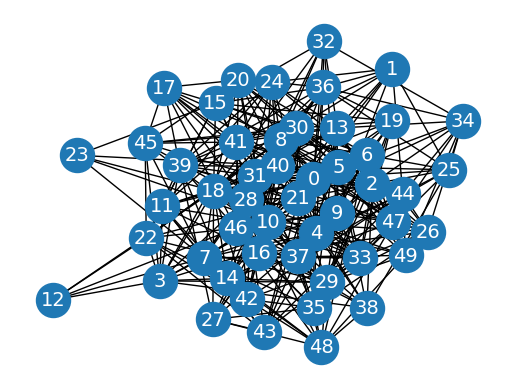

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.erdos_renyi_graph(50, 0.3, seed=1, directed=False)

# Plot graph
plt.figure()
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

In [ ]:
import random
random.seed(0)

def random_walk(start, length):
    walk = [str(start)]  # starting node

    for i in range(length):
        neighbors = [node for node in G.neighbors(start)]
        next_node = np.random.choice(neighbors, 1)[0]
        walk.append(str(next_node))
        start = next_node

    return walk

# Create a list of random walks
print(random_walk(0, 10))

['0', '20', '5', '46', '5', '20', '31', '6', '26', '29', '33']


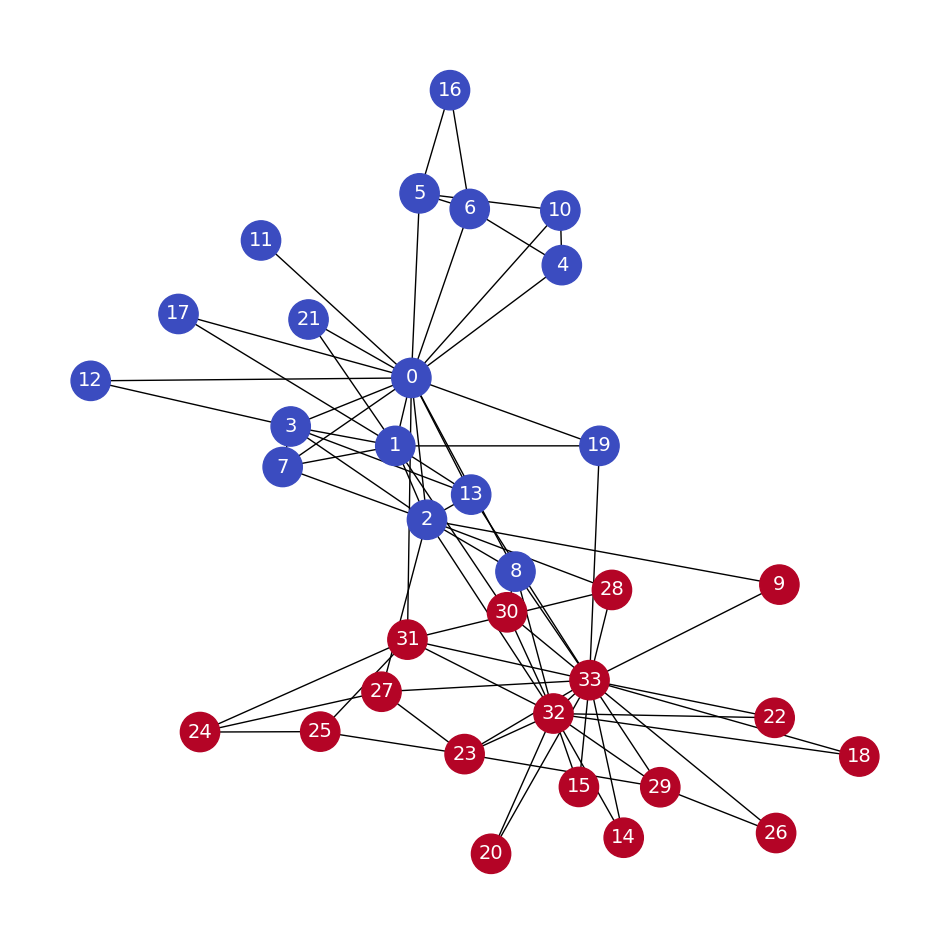

In [ ]:
# Load dataset
G = nx.karate_club_graph()

# Process labels (Mr. Hi = 0, Officer = 1)
labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

# Plot graph
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_color=labels,
                 node_size=800,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

In [ ]:
# Create a list of random walks
walks = []
for node in G.nodes:
    for _ in range(80):
        walks.append(random_walk(node, 10))

# Print the first random walk
print(walks[0])

['0', '31', '25', '24', '31', '32', '30', '8', '30', '32', '15']


In [ ]:
# Create Word2Vec
model = Word2Vec(walks,
                 hs=1,   # Hierarchical softmax
                 sg=1,   # Skip-gram
                 vector_size=100,
                 window=10,
                 workers=1,
                 seed=1)

print(f'Shape of embedding matrix: {model.wv.vectors.shape}')

# Build vocabulary
model.build_vocab(walks)

# Train model
model.train(walks, total_examples=model.corpus_count, epochs=30, report_delay=1)

Shape of embedding matrix: (34, 100)


(187189, 897600)

In [ ]:
# Most similar nodes
print('Nodes that are the most similar to node 0:')
for similarity in model.wv.most_similar(positive=['0']):
    print(f'   {similarity}')

# Similarity between two nodes
print(f"\nSimilarity between node 0 and 4: {model.wv.similarity('0', '4')}")

Nodes that are the most similar to node 0:
   ('10', 0.7589040994644165)
   ('4', 0.7019647359848022)
   ('6', 0.6715899705886841)
   ('11', 0.6465577483177185)
   ('21', 0.6229743361473083)
   ('1', 0.6183294057846069)
   ('5', 0.6083580255508423)
   ('12', 0.591379702091217)
   ('17', 0.5906403660774231)
   ('16', 0.5818696022033691)

Similarity between node 0 and 4: 0.7019646763801575


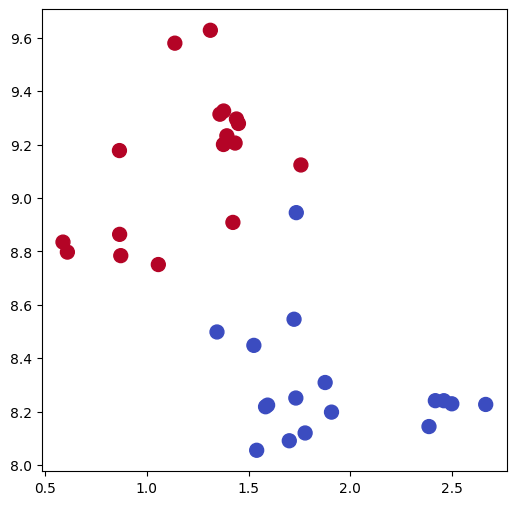

In [ ]:
from sklearn.manifold import TSNE

# Preprocess word vectors and label
nodes_wv = np.array([model.wv.get_vector(str(i)) for i in range(len(model.wv))])
labels = np.array(labels)

# Train TSNE
tsne = TSNE(n_components=2,
            learning_rate='auto',
            init='pca',
            random_state=0).fit_transform(nodes_wv)

# Plot TSNE
plt.figure(figsize=(6, 6))
plt.scatter(tsne[:, 0], tsne[:, 1], s=100, c=labels, cmap="coolwarm")
plt.show()